In [1]:
%load_ext blackcellmagic

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
import statsmodels.api as sm


Petite analyse exploratoire des features tactiques (sur les tirs de 4 matchs)

On commence par désérialiser les données

In [3]:
with open("train.pkl", "rb") as file:
    shots = pickle.load(file)
shots.head(22)


shot_id       player     team      match  ht  min  sec  time_sec  \
0   001_1_1102  Player_0044  Team_01  Match_001   1   18   22      1102   
1   001_1_1231  Player_0029  Team_02  Match_001   1   20   31      1231   
2   001_1_2066  Player_0088  Team_02  Match_001   1   34   26      2066   
3   001_1_2655  Player_0092  Team_01  Match_001   1   44   15      2655   
4   001_1_2658  Player_0021  Team_01  Match_001   1   44   18      2658   
5    001_1_563  Player_0060  Team_02  Match_001   1    9   23       563   
6    001_1_948  Player_0056  Team_02  Match_001   1   15   48       948   
7   001_2_1081  Player_0004  Team_02  Match_001   2   63    1      1081   
8   001_2_1234  Player_0060  Team_02  Match_001   2   65   34      1234   
9   001_2_1624  Player_0087  Team_01  Match_001   2   72    4      1624   
10  001_2_1700  Player_0060  Team_02  Match_001   2   73   20      1700   
11  001_2_2140  Player_0060  Team_02  Match_001   2   80   40      2140   
12  001_2_2328  Player_0085  Team_02  Match_001   2   83   48      2328   
13  001_2_2584  Player_0085  Team_02  Match_001   2   88    4      2584   
14   001_2_395  Player_0092  Team_01  Match_001   2   51   35       395   
15   001_2_954  Player_0029  Team_02  Match_001   2   60   54       954   
16  002_1_1166  Player_0059  Team_06  Match_002   1   19   26      1166   
17  002_1_1364  Player_0059  Team_06  Match_002   1   22   44      1364   
18  002_1_1442  Player_0036  Team_02  Match_002   1   24    2      1442   
19  002_1_1859  Player_0051  Team_06  Match_002   1   30   59      1859   
20  002_1_1869  Player_0051  Team_06  Match_002   1   31    9      1869   
21   002_1_192  Player_0051  Team_06  Match_002   1    3   12       192   

        x          y  dist_to_gk  dist_to_goal  field_of_view  x_abs  \
0   11.72  15.726742   15.792308     19.613485      17.226091  11.72   
1   15.75  12.582551   12.937484     20.158946      13.190311  15.75   
2    2.30   3.125678    7.111188      3.880704      85.839696   2.30   
3   17.91  13.816703   21.327616     22.620110      11.473864  17.91   
4   13.10  30.253889   30.025817     32.968285      11.656225  13.10   
5   -2.46  15.484366    9.005870     15.678558      25.997207   2.46   
6   16.62  27.259375   26.026888     31.926446      11.219983  16.62   
7   11.22  15.204973   13.095698     18.896550      17.944295  11.22   
8    6.90  30.295346   29.011601     31.071176      13.112524   6.90   
9   11.07  14.212787   12.524013     18.015222      18.487975  11.07   
10   4.55  10.849746   10.555743     11.765181      32.425336   4.55   
11  -3.26  21.787986   21.351274     22.030523      18.671932   3.26   
12 -13.43   7.760233    9.192938     15.510838      14.037970  13.43   
13  -4.11   1.948257    2.988143      4.548385      62.917961   4.11   
14  15.46  19.954633   24.210122     25.242800      13.178769  15.46   
15   0.01   5.762222    3.594844      5.762231      64.844997   0.01   
16   3.18  10.191033    9.083667     10.675652      36.565306   3.18   
17   4.34  17.392941   13.755410     17.926238      22.461469   4.34   
18 -12.10   2.228894    6.834654     12.303575       6.743534  12.10   
19   4.67  19.895093   15.085042     20.435842      19.812677   4.67   
20  -2.18  20.944557   15.644261     21.057703      19.622098   2.18   
21  -6.99  28.794151   19.688682     29.630444      13.700895   6.99   

    angle_to_y  nb_def_in_cone  closest_def   density   goal  
0    36.694491               1     1.021812  2.361822  False  
1    51.378918               0     0.606053  2.846259  False  
2    36.347135               0     0.895879  1.986178   True  
3    52.351542               3     5.859497  0.779724  False  
4    23.412717               4     4.170767  0.789383  False  
5     9.027133               1     1.593047  1.380979   True  
6    31.370599               1     9.557662  0.667765  False  
7    36.424228               0     1.912694  1.622101  False  
8    12.830689               3    11.061415  0.827389  Fa

On va plotter chaque feature selon la variable `goal` :

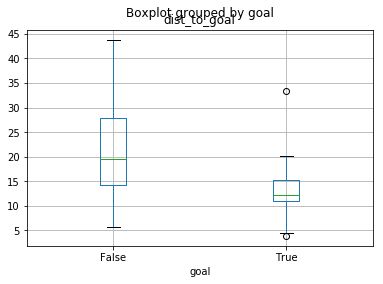

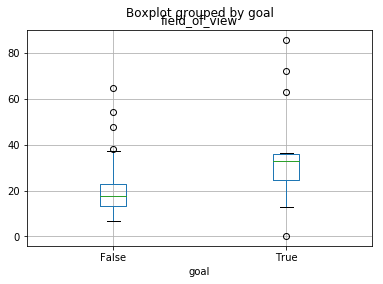

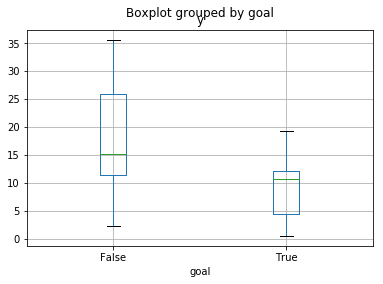

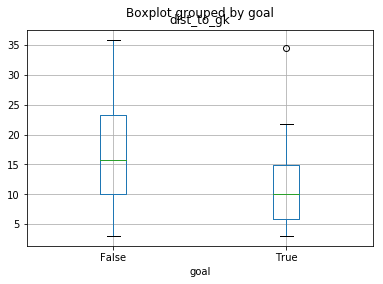

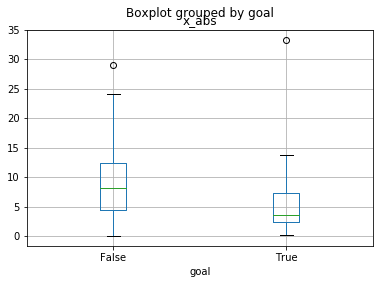

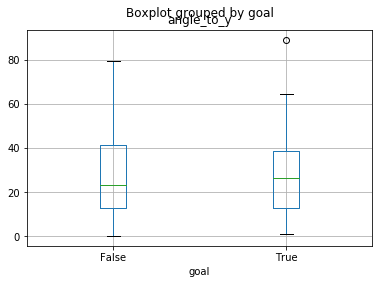

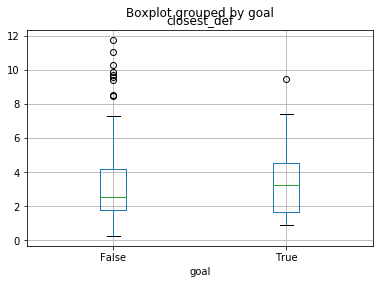

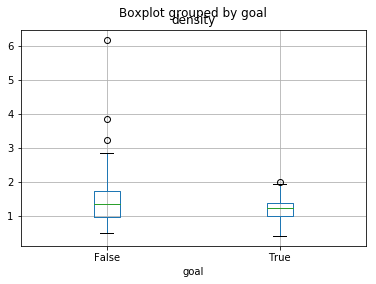

In [4]:
features = [
    "dist_to_goal",
    "field_of_view",
    "y",
    "dist_to_gk",
    "x_abs",
    "angle_to_y",
    "closest_def",
    "density",
    "nb_def_in_cone",
    "x",
]

for feature in features:
    boxplot = shots.boxplot(column= [feature], by="goal")


* Très peu de buts sont marqués quand $|x| > 10m$, il serait donc judicieux de prendre la valeur absolue de cette variable
* Majorité des tirs tentés : y entre 10 et 25m. majorités des buts : y entre 5 et 12m
* Même constant pour la distance au centre des cages : $[15, 30]$ vs $[10, 15]$
* l'angle par rapport à Y n'a pas (ou très peu) d'influence sur les chances de réussite d'un tir
* On augmente significativement ses chances de marquer avec un champ de vision $> 20°$
* La distance au goal a l'air d'être moins déterminante sur les chances de réussite d'un tir que la distance au centre des cages, mais elle reste quand même très importante
* la distance au défenseur le plus proche n'a pas l'air d'être très significative
* aucun but n'a été marqué alors qu'il avait plus d'un défenseur dans le cône de tir ! À voir avec + de données si on ne devrait pas discrétiser cette variable
* La densité a l'air de jouer un rôle : plus elle est grande, moins il est facile de marquer.

* À part la densité et le nombre de défenseurs dans le cône de tir, les variables sont du même ordre de grandeur. On aura donc pas à les normaliser (à part peut-être la densité), tant mieux car cela facilitera l'interprétation

In [7]:
shots.loc[:, features].rename(
    columns={
        "dist_to_goal": "distance tireur - centre des cages",
        "x": "écart à l'axe (x)",
        "field_of_view": "champ de vision",
        "y": "distance tireur-ligne de but (y)",
        "dist_to_gk": "distance tireur-gardien",
        "x_abs": "écart à l'axe (valeur absolue) (|x|)",
        "angle_to_y": "angle du tireur par rapport à l'axe",
        "closest_def": "distance au plus proche joueur adverse",
        "density": "densité",
        "nb_def_in_cone": "joueurs adverses dans le cône de tir",
    }
).describe().transpose().drop(["count", "25%", "75%"], axis=1)


mean        std        min  \
distance tireur - centre des cages      19.429077   8.885170   3.880704   
champ de vision                         22.823737  14.767738   0.202360   
distance tireur-ligne de but (y)        16.311695   8.924564   0.528384   
distance tireur-gardien                 15.985183   8.505424   2.988143   
écart à l'axe (valeur absolue) (|x|)     8.335316   6.463453   0.010000   
angle du tireur par rapport à l'axe     28.730799  20.285315   0.099433   
distance au plus proche joueur adverse   3.680284   2.870452   0.250799   
densité                                  1.452921   0.819365   0.397925   
joueurs adverses dans le cône de tir     1.303797   0.991689   0.000000   
écart à l'axe (x)                        2.146962  10.367059 -33.290000   

                                              50%        max  
distance tireur - centre des cages      18.044825  43.827592  
champ de vision                         18.671932  85.839696  
distance tireur-ligne de but (y)        13.816703  35.615854  
distance tireur-gardien                 14.422167  35.905679  
écart à l'axe (valeur absolue) (|x|)     7.670000  33.290000  
angle du tireur par rapport à l'axe     23.412717  89.090669  
distance au plus proche joueur adverse   2.988143  11.772391  
densité                                  1.312325   6.184298  
joueurs adverses dans le cône de tir     1.000000   4.000000  
écart à l'axe (x)                        1.790000  28.910000

In [6]:
def round_and_format(fl, arrondi=1, unit="m"):
    if arrondi == 0:
        result = round(fl)
    else:
        result = round(fl, arrondi)
    return str(result) + unit


shots.loc[:, features].describe().assign(
    dist_to_goal=lambda df: df.loc[:, "dist_to_goal"].map(round_and_format),
    field_of_view=lambda df: df.loc[:, "field_of_view"].map(
        lambda fl: round_and_format(fl, 0, "°")
    ),
    dist_to_gk=lambda df: df.loc[:, "dist_to_gk"].map(round_and_format),
    y=lambda df: df.loc[:, "y"].map(round_and_format),
    x_abs=lambda df: df.loc[:, "x_abs"].map(round_and_format),
    angle_to_y=lambda df: df.loc[:, "angle_to_y"].map(
        lambda fl: round_and_format(fl, 0, "°")
    ),
    closest_def=lambda df: df.loc[:, "closest_def"].map(round_and_format),
    density=lambda df: df.loc[:, "density"].map(lambda fl: round_and_format(fl, 1, "")),
    nb_def_in_cone=lambda df: df.loc[:, "nb_def_in_cone"].map(
        lambda fl: round_and_format(fl, 1, "")
    ),
    x=lambda df: df.loc[:, "x"].map(round_and_format),
).rename(
    columns={
        "dist_to_goal": "distance tireur-centre des cages",
        "x": "écart à l'axe (x)",
        "field_of_view": "champ de vision",
        "y": "distance tireur-ligne de but (y)",
        "dist_to_gk": "distance tireur-gardien",
        "x_abs": "écart à l'axe (valeur absolue) (|x|)",
        "angle_to_y": "angle du tireur par rapport à l'axe",
        "closest_def": "distance au plus proche joueur adverse",
        "density": "densité",
        "nb_def_in_cone": "joueurs adverses dans le cône de tir",
    }
).transpose().drop(
    ["count", "25%", "75%"], axis=1
)


mean    std     min    50%    max
distance tireur-centre des cages        19.4m   8.9m    3.9m  18.0m  43.8m
champ de vision                           23°    15°      0°    19°    86°
distance tireur-ligne de but (y)        16.3m   8.9m    0.5m  13.8m  35.6m
distance tireur-gardien                 16.0m   8.5m    3.0m  14.4m  35.9m
écart à l'axe (valeur absolue) (|x|)     8.3m   6.5m    0.0m   7.7m  33.3m
angle du tireur par rapport à l'axe       29°    20°      0°    23°    89°
distance au plus proche joueur adverse   3.7m   2.9m    0.3m   3.0m  11.8m
densité                                   1.5    0.8     0.4    1.3    6.2
joueurs adverses dans le cône de tir      1.3    1.0     0.0    1.0    4.0
écart à l'axe (x)                        2.1m  10.4m  -33.3m   1.8m  28.9m

Jetons un oeil au corrplot

In [ ]:
def corr_plot(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr,
                         mask=mask,
                         vmin=-1, vmax=1, center=0, square=True, cmap="PuOr")
    return ax

shots.loc[:, features].pipe(corr_plot)


In [ ]:
sns.pairplot(shots.loc[:, features + ["goal"]], hue='goal')

Coefficients d'un GLM :

In [ ]:
X = shots.loc[:, features].to_numpy(dtype=np.float32)
y = shots.loc[:, "goal"].to_numpy(dtype=np.float32)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score()